In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df_2019 = pd.read_csv(r'/content/drive/MyDrive/happiness/WHR_2019.csv')
df_2020 = pd.read_csv(r'/content/drive/MyDrive/happiness/WHR_2020.csv')
df_2021 = pd.read_csv(r'/content/drive/MyDrive/happiness/WHR_2021.csv')
df_2022 = pd.read_csv(r'/content/drive/MyDrive/happiness/WHR_2022.csv')
df_2023 = pd.read_csv(r'/content/drive/MyDrive/happiness/WHR_2023.csv')

In [5]:

#Fill the null value found in EDA process
#No more data cleaning required
df_2023 = df_2023.fillna(df_2023['healthy_life_expectancy'].mean())
df_2023.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

# **What are the global trends in happiness scores over the years, and are there any noticeable patterns or shifts?**

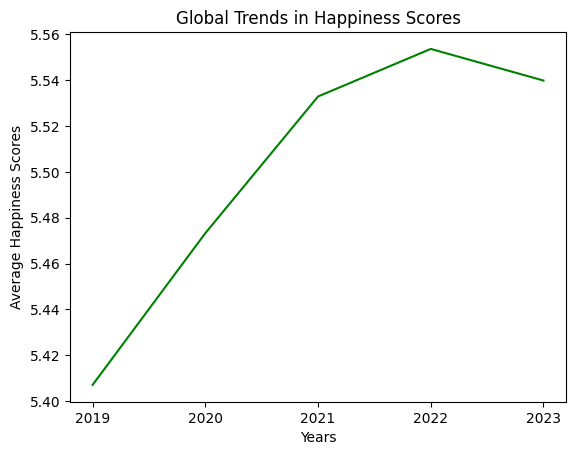

In [6]:
mean_happiness_scores = [df_2019['happiness_score'].mean(),
                         df_2020['happiness_score'].mean(),
                         df_2021['happiness_score'].mean(),
                         df_2022['happiness_score'].mean(),
                         df_2023['happiness_score'].mean()]

years = ['2019', '2020', '2021', '2022', '2023']
plt.plot(years, mean_happiness_scores, color = "green")
plt.xlabel("Years")
plt.ylabel("Average Happiness Scores")
plt.title("Global Trends in Happiness Scores")
plt.show()

# **How do key indicators vary across different regions?**

In [39]:
regional_data_2019 = df_2019.groupby('region')[df_2019.columns[2:9]].mean().sort_values(by='happiness_score', ascending=False)
regional_data_2020 = df_2020.groupby('region')[df_2020.columns[2:9]].mean().sort_values(by='happiness_score', ascending=False)
regional_data_2021 = df_2021.groupby('region')[df_2021.columns[2:9]].mean().sort_values(by='happiness_score', ascending=False)
regional_data_2022 = df_2022.groupby('region')[df_2022.columns[2:9]].mean().sort_values(by='happiness_score', ascending=False)
regional_data_2023 = df_2023.groupby('region')[df_2023.columns[2:9]].mean().sort_values(by='happiness_score', ascending=False)


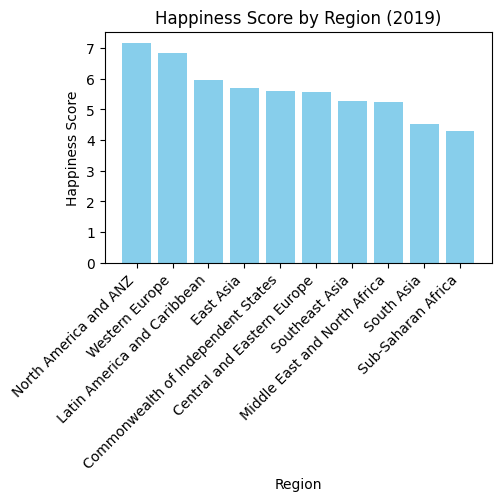

In [67]:
plt.figure(figsize=(5, 3))
plt.bar(regional_data_2019.index, regional_data_2019['happiness_score'], color = "skyblue")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Region (2019)')
plt.show()

In [62]:
import plotly.express as px

#Plot the regional happiness scores
fig_happiness_2019 = px.bar(
    regional_data_2019,
    x=regional_data_2019.index,
    y='happiness_score',
    color='happiness_score',
    labels={'happiness_score': 'Happiness Score'},
    title='Happiness Score by Region (2019)',
    hover_data = {'happiness_score': ':.2f'}
)

fig_happiness_2019.update_layout(
    xaxis=dict(title='Region', tickangle=45, tickmode='array', tickvals=regional_data_2019.index),
    yaxis=dict(title='Happiness Score'),
)

fig_happiness_2019.show()

#Plot the regional key indicators

#Transform the data from wide to long format
melted_data_2019 = pd.melt(regional_data_2019.reset_index(), id_vars='region', value_vars = regional_data_2019.columns[2:7], var_name='Indicator', value_name='Value')


fig_2019 = px.bar(
    melted_data_2019,
    x=melted_data_2019.columns[0],
    y='Value',
    color='Indicator',
    title='Average Key Indicators by Region (2019)',
    labels={'value': 'Average Key Indicators'},
    hover_data={'Value': ':.2f'},
    barmode='group'
)
fig_2019.update_xaxes(title_text='Region')
fig_2019.update_yaxes(title_text='Average Key Indicators')
fig_2019.show()

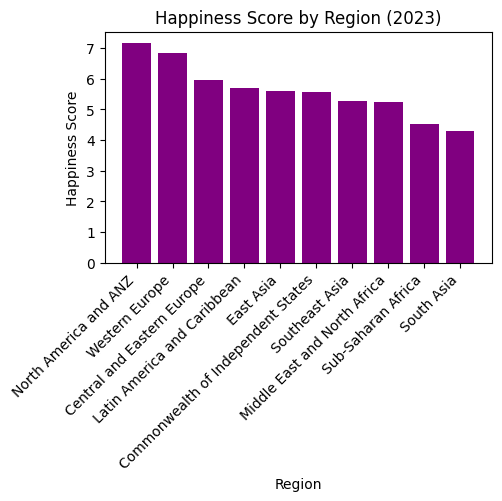

In [70]:
plt.figure(figsize=(5, 3))
plt.bar(regional_data_2023.index, regional_data_2019['happiness_score'], color = "purple")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Region (2023)')
plt.show()

In [63]:
import plotly.express as px

#Plot the regional happiness scores
fig_happiness_2023 = px.bar(
    regional_data_2023,
    x=regional_data_2023.index,
    y='happiness_score',
    color='happiness_score',
    labels={'happiness_score': 'Happiness Score'},
    title='Happiness Score by Region (2023)',
    hover_data = {'happiness_score': ':.2f'}
)

fig_happiness_2023.update_layout(
    xaxis=dict(title='Region', tickangle=45, tickmode='array', tickvals=regional_data_2023.index),
    yaxis=dict(title='Happiness Score'),
)

fig_happiness_2023.show()

#Plot the regional key indicators

#Transform the data from wide to long format
melted_data_2023 = pd.melt(regional_data_2023.reset_index(), id_vars='region', value_vars = regional_data_2023.columns[2:7], var_name='Indicator', value_name='Value')


fig_2023 = px.bar(
    melted_data_2023,
    x=melted_data_2023.columns[0],
    y='Value',
    color='Indicator',
    title='Average Key Indicators by Region (2023)',
    labels={'value': 'Average Key Indicators'},
    hover_data={'Value': ':.2f'},
    barmode='group'
)
fig_2023.update_xaxes(title_text='Region')
fig_2023.update_yaxes(title_text='Average Key Indicators')
fig_2023.show()

# **Do wealthier countries tend to have populations with longer life expectancies?**

In [101]:
selected_columns = df_2023[['country', 'gdp_per_capita', 'healthy_life_expectancy']]
selected_columns = selected_columns.sort_values(by=['gdp_per_capita','healthy_life_expectancy'], ascending=False )
selected_columns = selected_columns.head(10)

import plotly.express as px
fig_2023 = px.bar(
    selected_columns,
    x='country',
    y=['gdp_per_capita', 'healthy_life_expectancy'],
    title='Wealthier Countries vs Life Expectancy',
    barmode='group'
)

fig_2023.show()


# **Do more generous countries tend to perceive lower levels of corruption?**

In [107]:
selected_columns = df_2023[['country', 'generosity', 'perceptions_of_corruption']]
selected_columns = selected_columns.sort_values(by=['generosity','perceptions_of_corruption'], ascending=False )
selected_columns = selected_columns.head(5)

import plotly.express as px
fig_2023 = px.bar(
    selected_columns,
    x='country',
    y=['generosity', 'perceptions_of_corruption'],
    title='Top 5 Most Generous Countries vs. Corruption Perception',
    barmode='group'
)

fig_2023.show()